## Financial Data Analysis, USTC

**July 2020**

### Jeff Levy
**Harris School of Public Policy, University of Chicago**

----------

## Economics and Machine Learning

  * Economists often have too little data, not too much
  * The need for big data methods is relatively new
  * Data scientists and social scientists _speak different languages_
  * Data scientists and social scientists _make different assumptions_
  
### Resources:
  * https://economics.sas.upenn.edu/system/files/2019-03/GCLSS_MC_MacroFcst.pdf
  * https://urbaninstitute.github.io/spark-social-science-manual/
  * https://github.com/UrbanInstitute/pyspark-tutorials
  * https://github.com/UrbanInstitute/sparkr-tutorials
  * https://github.com/UrbanInstitute/sloan-spark-presentation
  
------

# Introduction to Machine Learning

### Supervised
  * Regression
  * Classification
  
### Unsupervised
  * Dimensionality Reduction
  * Clustering
  
---------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Machine Learning in Python with Scikit-Learn

__Steps__

1. Choose a model by importing its class from Scikit-Learn
2. Choose (non-data) parameters by creating 
an instance of the above class
3. Arrange data into the labels matrix and features matrix
4. Fit the data to the instance of the model
5. Examine results (e.g. predict, plot)

## Supervised --> Regression

**1. Choose a model**

In [2]:
from sklearn.linear_model import LinearRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**2. Choose parameters**

In [3]:
model = LinearRegression(fit_intercept=False)

**3. Arrange data**

In [4]:
x = np.random.uniform(0, 10, (10, 10))
y = [sum(r) for r in x]

**4. Fit data**

In [5]:
results = model.fit(x, y)

**5. Examine results**

In [6]:
results.coef_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
results.intercept_

0.0

*What about p-values?*

https://urbaninstitute.github.io/spark-social-science-manual/appendix.html#unbounded-sample-size-statistical-significance-sketch-of-proof

## Supervised --> Classification

In [8]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

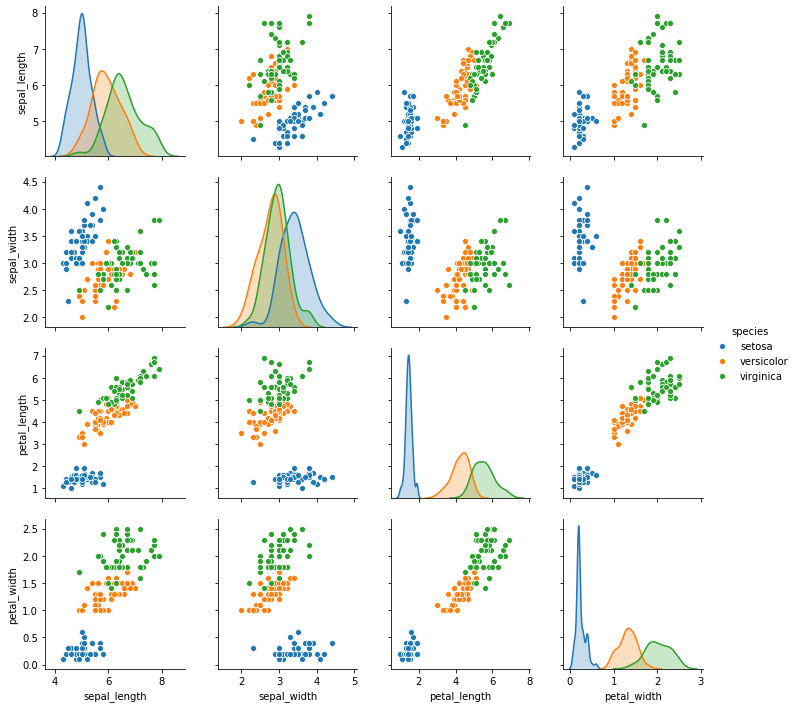

In [11]:
sns.pairplot(iris, hue='species');

**1. Choose a model**

In [12]:
from sklearn.svm import SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

**2. Choose parameters**

In [13]:
model = SVC(gamma='auto')

**3. Arrange data**

In [14]:
X = iris.drop('species', axis=1)
Y = iris['species']
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [15]:
#split data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=123)

In [16]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


**4. Fit model**

In [17]:
results = model.fit(X_train, Y_train) #training data only
predict = model.predict(X_test) #X testing data

**5. Examine results**

In [18]:
predict

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa'], dtype=object)

In [19]:
# Tools to compare predictions to Y_test

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(Y_test, predict)

0.9666666666666667

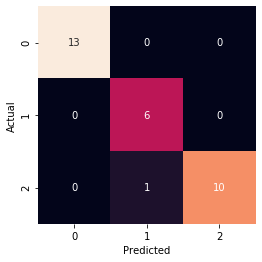

In [21]:
mat = confusion_matrix(Y_test, predict)
ax = sns.heatmap(mat, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

In [22]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Unsupervised --> Dimensionality reduction

Can your data be described in fewer variables?

Example: You have too many variables (features) in your data, and want to reduce them to a managable size without loosing information

https://scikit-learn.org/stable/modules/unsupervised_reduction.html

## Unsupervised --> Clustering

Can we identify logical "clusters" within your data?

Example: Handwriting analysis

https://scikit-learn.org/stable/modules/clustering.html

--------

# Data: Economic Policy Uncertainty Index

### Sources of macro data

  * https://research.stlouisfed.org/econ/mccracken/fred-databases/
  * https://www.policyuncertainty.com/

In [23]:
china = r'https://www.policyuncertainty.com/media/SCMP_China_Policy_Uncertainty_Data.xlsx'
usa   = r'https://www.policyuncertainty.com/media/US_Policy_Uncertainty_Data.xlsx'

In [24]:
def load_and_parse(url):
    df = pd.read_excel(url, skipfooter=1)
    if 'Three_Component_Index' in df.columns:
        df = df.drop('Three_Component_Index', axis=1).rename({'Year':'year', 'Month':'month'}, axis=1)

    df['day'] = 1
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(['year', 'month', 'day'], axis=1)
    df = df.set_index('date')
    
    df = df.rename({'News_Based_Policy_Uncert_Index':'EPU_USA', 'China News-Based EPU':'EPU_China'}, axis=1)
    return df

In [25]:
df = load_and_parse(usa).merge(load_and_parse(china), how='right', left_index=True, right_index=True)

In [26]:
df.head()

,EPU_USA,EPU_China
date,,
1995-01-01,122.406372,192.911911
1995-02-01,100.515556,193.987854
1995-03-01,86.486168,88.227036
1995-04-01,65.995567,131.034714
1995-05-01,67.301651,177.096863


In [27]:
def event_vlines(ax):
    ymax = ax.get_ylim()[1]

    plt.axvline(x=datetime.datetime(2001,9,11), color='k', linestyle=':', ymin=0, ymax=1)
    plt.text(datetime.datetime(2001,9,11), ymax*1.05, '9/11', horizontalalignment='center', style='italic')
    plt.axvline(x=datetime.datetime(2003,3,20), color='k', linestyle=':', ymin=0, ymax=1)
    plt.text(datetime.datetime(2003,3,20), ymax*1.01, 'Iraq', horizontalalignment='center', style='italic')
    plt.axvline(x=datetime.datetime(2007,7,1), color='k', linestyle=':', ymin=0, ymax=1)
    plt.text(datetime.datetime(2007,7,1), ymax*1.01, 'Bear Stearns', horizontalalignment='center', style='italic')
    plt.axvline(x=datetime.datetime(2008,9,15), color='k', linestyle=':', ymin=0, ymax=1)
    plt.text(datetime.datetime(2008,9,15), ymax*1.05, 'Lehman', horizontalalignment='center', style='italic')
    plt.axvline(x=datetime.datetime(2009,6,1), color='k', linestyle=':', ymin=0, ymax=1)
    plt.text(datetime.datetime(2009,6,1), ymax*1.01, 'GM', horizontalalignment='center', style='italic')
    plt.axvline(x=datetime.datetime(2020,3,1), color='k', linestyle=':', ymin=0, ymax=1)
    plt.text(datetime.datetime(2020,3,1), ymax*1.01, 'US Covid Crash', horizontalalignment='center', style='italic')
    return ax

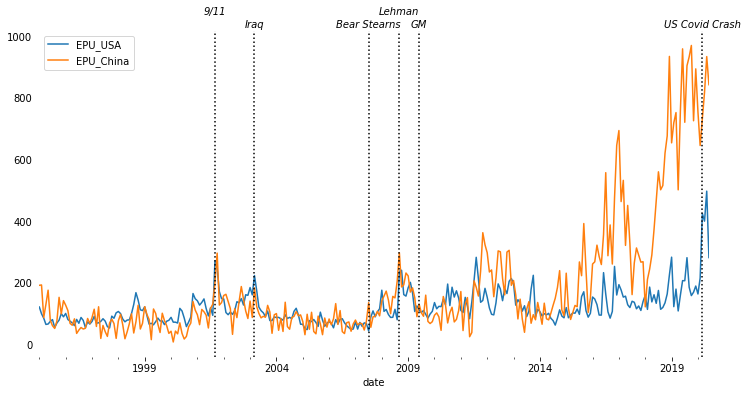

In [28]:
ax = df.plot(figsize=(12,6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax = event_vlines(ax);

  * Uncertainty has been shown to be a leading indicator
  * Beyond news: forecaster disagreement, stock volatility, Google searches
  * Disaggregated uncertainty: states and provinces